## Hierarchical matching

In [8]:
from preprocessing.clean_text import clean_text
from preprocessing.matcher import Matcher
from preprocessing.embedding_models.bert_embedder import BertEmbedderAvg
from preprocessing.embedding_models.food2vec_embedder import Food2VecEmbedder
import pandas as pd

In [11]:
# load the data internal and external
internal_data= pd.read_csv('../data/nodes_191120.csv')

#delete nan in node name column
internal_data = internal_data.dropna(subset=['name'])

# make sure name is a string
internal_data['name'] =internal_data['name'].astype(str)

internal_data_names = internal_data['name'].tolist()

internal_data.head()

,node_id,name,id,node_type,is_hub
0,0,1%_fat_buttermilk,NaN,ingredient,no_hub
1,1,1%_fat_cottage_cheese,NaN,ingredient,no_hub
2,3,10%_cream,NaN,ingredient,no_hub
3,4,100%_bran,NaN,ingredient,no_hub
4,5,10_inch_flour_tortilla,NaN,ingredient,no_hub


In [12]:
# calories dataset
external_data= pd.read_csv('../data/ABBREV.csv')
external_data_names = external_data['Shrt_Desc'].tolist()
external_data.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [13]:
cleaned_internal_names = [clean_text(name) for name in internal_data_names]
cleaned_external_names = [clean_text(name) for name in external_data_names]

## Hierarchical Matching on Bert

In [10]:
# hiererchical matching on the data
matcher_bert = Matcher(BertEmbedderAvg(), cleaned_internal_names, cleaned_external_names)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
matching_results_bert = matcher_bert.run()
matching_results_bert.head(20)

Embedding external, hierarchical data: 100%|██████████| 38322/38322 [27:55<00:00, 22.87it/s]


,internal,best_match,index_of_bast_match,exact_best_match,similarity
0,1% fat buttermilk,milk buttermilk dried,275,milk buttermilk dried,0.859678
1,1% fat cottage cheese,cheese cottage low fat 1% milk fat,44,cheese cottage low fat 1% milk fat,0.852293
2,10% cream,cream fluid half and half,128,cream,0.786920
3,100% bran,mixed nut oil roasted with peanut,15333,mixed nut,0.778790
4,10 inch flour tortilla,wheat flour white tortilla mix enriched,28417,wheat flour white tortilla mix,0.881951
5,12 inch pizza crust,"pizza hut 12"" chip pizza pan crust",29269,"pizza hut 12"" chip pizza pan crust",0.837442
6,18% table cream,margarine reg 80% fat comp steak with salt,2740,margarine reg 80% fat,0.807036
7,2% buttermilk,milk buttermilk fluid cultured low fat,248,milk buttermilk,0.876479
8,2% cheddar cheese,cheese cheddar,18,cheese cheddar,0.879752
9,2% evaporated milk,milk fluid 1% fat vitamin a vitamin d,537,milk fluid 1% fat,0.791714


In [13]:
#save hierarchical matching results
matching_results_bert.to_csv('../data/results/hierarchical_Bert_Avg_matching_results.csv')

# Hierarchical matching on F2V

In [5]:
from preprocessing.embedding_models.food2vec_embedder import Food2VecEmbedder

In [6]:
matcher_f2v = Matcher(Food2VecEmbedder(), cleaned_internal_names, cleaned_external_names)

------ALERT--------
You're using demonstration nutrition data. This is a random subset (~100 items) from our annotated database.
We do not have permission to distribute our full dataset, and we recommend processing your own.
The USDA provides an excellent start: https://fdc.nal.usda.gov/
You can suppress this warning by setting the 'demo_warning' parameter to False.
-------------------


In [7]:
matching_results_f2v = matcher_f2v.run()
matching_results_f2v.head(20)

Embedding external, hierarchical data: 100%|██████████| 38322/38322 [00:01<00:00, 28443.12it/s]


,internal,best_match,index_of_bast_match,exact_best_match,similarity
0,1% fat buttermilk,milk buttermilk fluid cultured red fat,37689,milk buttermilk fluid cultured red fat,0.862306
1,1% fat cottage cheese,cheese cottage low fat 2% milk fat,39,cheese cottage low fat,0.935472
2,10% cream,cream fluid half and half,128,cream,1.000000
3,100% bran,oat bran raw,28260,oat bran,0.873722
4,10 inch flour tortilla,tortilla ready-to-bake or -fry flour refrigerated,26130,tortilla ready-to-bake or -fry flour,0.907184
5,12 inch pizza crust,"papa john's 14"" pepperoni pizza original crust",29293,"papa john's 14"" pepperoni pizza original crust",0.854801
6,18% table cream,cream fluid light coffee cream or table cream,133,cream fluid light coffee cream or table cream,0.873806
7,2% buttermilk,milk buttermilk fluid cultured low fat,248,milk buttermilk,0.894941
8,2% cheddar cheese,cheese cheddar,18,cheese cheddar,1.000000
9,2% evaporated milk,milk filled fluid with blend of hydrated veg oil,156,milk,0.745948


In [12]:
matching_results_f2v.to_csv('../data/results/hierarchical_F2V_matching_results.csv')

# Hierarchical matching on domain-adapted Bert

In [14]:
from preprocessing.embedding_models.bert_domain_addapt_embedder import BertAvgDomainAddaptEmbedder

In [15]:
matcher_bert_dom_adapt = Matcher(BertAvgDomainAddaptEmbedder(), cleaned_internal_names, cleaned_external_names)

Some weights of the model checkpoint at ja-nina/bert-base-uncased-dietdupe-foodb-desc were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at ja-nina/bert-base-uncased-dietdupe-foodb-desc and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probab

In [16]:
matching_results_dom_adapt = matcher_bert_dom_adapt.run()
matching_results_dom_adapt.head(20)

Embedding external, hierarchical data: 100%|██████████| 38322/38322 [35:31<00:00, 17.98it/s] 


,internal,best_match,index_of_bast_match,exact_best_match,similarity
0,1% fat buttermilk,milk buttermilk fluid cultured red fat,37686,milk buttermilk,0.881938
1,1% fat cottage cheese,cheese cottage low fat 1% milk fat,44,cheese cottage low fat 1% milk fat,0.846616
2,10% cream,milk imitation non-soy,38224,milk imitation,0.742896
3,100% bran,mixed nut dry roasted with peanut,15323,mixed nut,0.757383
4,10 inch flour tortilla,wheat flour white tortilla mix enriched,28417,wheat flour white tortilla mix,0.899105
5,12 inch pizza crust,"little caesar 14"" chip pizza thin crust",29309,"little caesar 14"" chip pizza thin crust",0.844323
6,18% table cream,ground turkey 85% lean 15% fat raw,4558,ground turkey 85% lean 15% fat raw,0.791696
7,2% buttermilk,milk buttermilk fluid cultured low fat,248,milk buttermilk,0.882530
8,2% cheddar cheese,cheese cheddar,18,cheese cheddar,0.904640
9,2% evaporated milk,milk red fat fluid 2% milk fat with added nfms...,208,milk red fat fluid 2% milk fat with added nfms,0.793527


In [17]:
matching_results_dom_adapt.to_csv('../data/results/hierarchical_Bert_Dom_Adapt_matching_results.csv')

# histograms of similarity between samples


In [18]:
from utils import plot_histogram

In [19]:
matching_results_f2v = pd.read_csv('../data/results/hierarchical_F2V_matching_results.csv')
matching_results_bert = pd.read_csv('../data/results/hierarchical_Bert_Avg_matching_results.csv')
matching_results_dom_adapt = pd.read_csv('../data/results/hierarchical_Bert_Dom_Adapt_matching_results.csv')

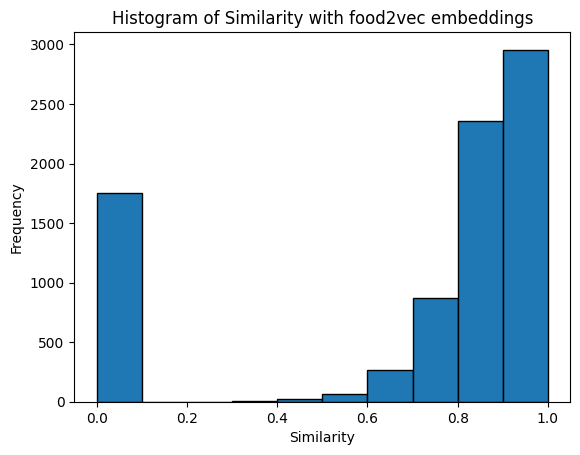

In [20]:
plot_histogram(matching_results_f2v, 'similarity', 'food2vec')

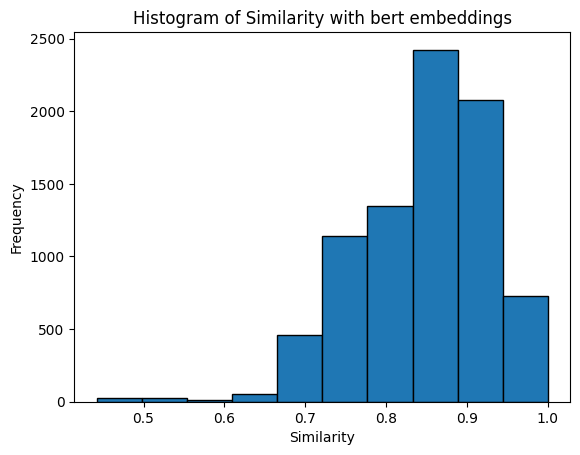

In [21]:
plot_histogram(matching_results_bert, 'similarity', 'bert')

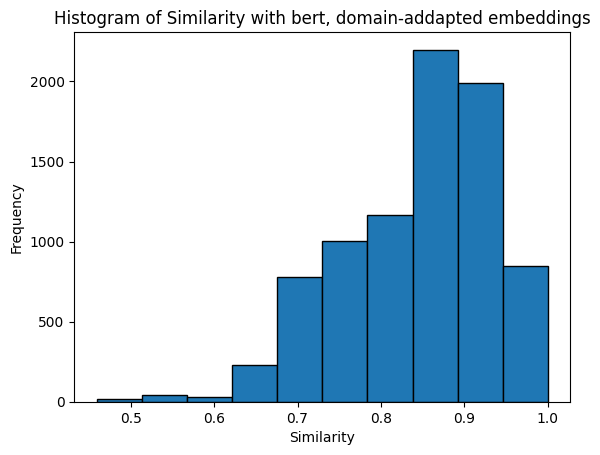

In [22]:
plot_histogram(matching_results_dom_adapt, 'similarity', 'bert, domain-addapted')

As we can observe the non-domain matched bert matchings with lover similarity than 0.75 do not make muchn sense

In [33]:
matching_results_bert[matching_results_bert['similarity'] < 0.75].tail(1000)

,Unnamed: 0,internal,best_match,index_of_bast_match,exact_best_match,similarity
2067,2067,emeril's original essence,cornmeal white self-rising bolted plain enriched,28594,cornmeal white self-rising bolted,0.677883
2086,2086,erythritol,inf formula mead johnson enfamillipil with irn...,1837,inf formula mead johnson enfamillipil with irn...,0.736717
2089,2089,espresso,beverage coffee brewed espresso rest-prep deca...,19018,beverage coffee brewed espresso,0.726618
2096,2096,evaporated cane juice,lemon juice from concentrate bottled concord,9293,lemon juice from concentrate bottled concord,0.748057
2098,2098,evaporated milk,milk filled fluid with blend of hydrated veg oil,158,milk filled fluid,0.728021
...,...,...,...,...,...,...
8280,8280,eicosan-1-ol,silk plus omega-3 docosahexaenoic acid soymilk,21498,silk plus omega-3 docosahexaenoic acid,0.743159
8281,8281,hentriacosane,succotash corn lima raw,13215,succotash,0.745661
8286,8286,hydroxytyrosol,inf formula mead johnson enfamillipil with irn...,1837,inf formula mead johnson enfamillipil with irn...,0.727875
8287,8287,alpha-santalene,peach dehyd low-moisture sulfured uncooked,8767,peach dehyd low-moisture sulfured,0.712958


In [27]:
matching_results_dom_adapt[matching_results_dom_adapt['similarity'] < 0.75]

,Unnamed: 0,internal,best_match,index_of_bast_match,exact_best_match,similarity
2,2,10% cream,milk imitation non-soy,38224,milk imitation,0.742896
16,16,7 up,tea tundra herb laborador combination alaska n...,36954,tea,0.707972
31,31,9 inch pie shell,lamb australian imp fresh shoulder blade lean ...,24255,lamb australian imp fresh shoulder blade lean ...,0.706370
34,34,absinthe,celery raw,12000,celery,0.680510
35,35,absolut citron vodka,apricot canned water pk sol liquid,8162,apricot canned water pk sol liquid,0.743603
...,...,...,...,...,...,...
8292,8292,procyanidin b2,inf form me jo next step proso lipil reato fee...,2105,inf form me jo next step proso lipil reato fee...,0.710562
8293,8293,procyanidin c,brd gluten-free white made with tapioca starch...,36257,brd gluten-free white,0.687729
8294,8294,6-keto-28-homobrassinolide,silk plus omega-3 docosahexaenoic acid soymilk,21498,silk plus omega-3 docosahexaenoic acid,0.736082
8295,8295,anthocyanidins,silk plus omega-3 docosahexaenoic acid soymilk,21498,silk plus omega-3 docosahexaenoic acid,0.732687


In [39]:
# Compare results from domain addapted bert and bert 
merged_df = pd.merge(matching_results_bert, matching_results_dom_adapt, on=['Unnamed: 0', 'internal'], suffixes=('_bert', '_bert_dom_adapt'))

# Compute the difference between the similarity scores
merged_df['similarity_difference'] = merged_df['similarity_bert'] - merged_df['similarity_bert_dom_adapt']

merged_df_comprarisons = merged_df[['internal','best_match_bert', 'best_match_bert_dom_adapt', 'similarity_bert', 'similarity_bert_dom_adapt', 'similarity_difference']]
merged_df_comprarisons.head(40)

,internal,best_match_bert,best_match_bert_dom_adapt,similarity_bert,similarity_bert_dom_adapt,similarity_difference
0,1% fat buttermilk,milk buttermilk dried,milk buttermilk fluid cultured red fat,0.859678,0.881938,-0.022259
1,1% fat cottage cheese,cheese cottage low fat 1% milk fat,cheese cottage low fat 1% milk fat,0.852293,0.846616,0.005677
2,10% cream,cream fluid half and half,milk imitation non-soy,0.786920,0.742896,0.044024
3,100% bran,mixed nut oil roasted with peanut,mixed nut dry roasted with peanut,0.778790,0.757383,0.021407
4,10 inch flour tortilla,wheat flour white tortilla mix enriched,wheat flour white tortilla mix enriched,0.881951,0.899105,-0.017154
5,12 inch pizza crust,"pizza hut 12"" chip pizza pan crust","little caesar 14"" chip pizza thin crust",0.837442,0.844323,-0.006882
6,18% table cream,margarine reg 80% fat comp steak with salt,ground turkey 85% lean 15% fat raw,0.807036,0.791696,0.015340
7,2% buttermilk,milk buttermilk fluid cultured low fat,milk buttermilk fluid cultured low fat,0.876479,0.882530,-0.006051
8,2% cheddar cheese,cheese cheddar,cheese cheddar,0.879752,0.904640,-0.024889
9,2% evaporated milk,milk fluid 1% fat vitamin a vitamin d,milk red fat fluid 2% milk fat with added nfms...,0.791714,0.793527,-0.001813
